# Cluster Based Analysis for Patients with BB

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

% matplotlib inline

In [130]:
import pandas as pd
data = pd.read_csv("/Users/joudsi/Desktop/subdata_bb_norm_clustered.csv")

In [131]:
data.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
0,0,0.558335,0.0,0.713859,0.903968,0.346149,0.032558,0.246377,0.452381,0.735683,0.081558,0.050583,0.666667,0.820529,1,0
1,1,0.967606,0.0,0.684853,0.905051,0.322675,0.032558,0.217391,0.500000,0.501573,0.118514,0.049349,0.500000,0.555009,1,0
2,2,0.908553,0.0,0.580397,0.988272,0.180286,0.213953,0.466667,0.321429,0.402140,0.133297,0.059219,0.559524,0.414874,2,0
3,3,0.585965,0.0,0.588939,0.950327,0.240689,0.055814,0.355072,0.238095,0.385777,0.131258,0.098699,0.238095,0.385372,2,0
4,4,0.545732,1.0,0.706385,0.954789,0.324970,0.037209,0.172705,0.464286,0.388981,0.152040,0.068472,0.452381,0.414054,0,0


In [132]:
print("# of observations: ", str(len(data.index)))

('# of observations: ', '5997')


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997 entries, 0 to 5996
Data columns (total 16 columns):
Unnamed: 0          5997 non-null int64
amdission_age       5997 non-null float64
gender              5997 non-null float64
tempc_mean          5997 non-null float64
spo2_mean           5997 non-null float64
resprate_mean       5997 non-null float64
creatinine_mean     5997 non-null float64
potassium_mean      5997 non-null float64
bicarbonate_mean    5997 non-null float64
hematocrit_mean     5997 non-null float64
glucose_mean        5997 non-null float64
lactate_mean        5997 non-null float64
albumin_mean        5997 non-null float64
hemoglobin_mean     5997 non-null float64
clust               5997 non-null int64
is_AKI              5997 non-null int64
dtypes: float64(13), int64(3)
memory usage: 749.7 KB


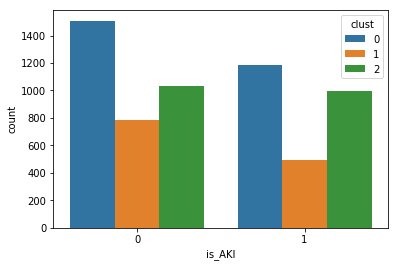

In [134]:
sns.countplot(x="is_AKI", hue="clust",data=data)

## LR Analysis C0

In [135]:
data.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
0,0,0.558335,0.0,0.713859,0.903968,0.346149,0.032558,0.246377,0.452381,0.735683,0.081558,0.050583,0.666667,0.820529,1,0
1,1,0.967606,0.0,0.684853,0.905051,0.322675,0.032558,0.217391,0.500000,0.501573,0.118514,0.049349,0.500000,0.555009,1,0
2,2,0.908553,0.0,0.580397,0.988272,0.180286,0.213953,0.466667,0.321429,0.402140,0.133297,0.059219,0.559524,0.414874,2,0
3,3,0.585965,0.0,0.588939,0.950327,0.240689,0.055814,0.355072,0.238095,0.385777,0.131258,0.098699,0.238095,0.385372,2,0
4,4,0.545732,1.0,0.706385,0.954789,0.324970,0.037209,0.172705,0.464286,0.388981,0.152040,0.068472,0.452381,0.414054,0,0


In [136]:
data0 = data[data['clust']==0]

In [137]:
t = data0.drop("is_AKI", axis=1)
X0 = t.drop('clust', axis = 1)
Y0 = data0["is_AKI"]

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X0,Y0, test_size=0.3, random_state=1)

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
logmodel = LogisticRegression()

In [142]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [143]:
predictions = logmodel.predict(X_test)

In [144]:
from sklearn.metrics import classification_report

In [145]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.59      0.85      0.70       447\n           1       0.60      0.28      0.38       362\n\n   micro avg       0.60      0.60      0.60       809\n   macro avg       0.60      0.57      0.54       809\nweighted avg       0.60      0.60      0.56       809\n'

In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
confusion_matrix(y_test, predictions)

array([[380,  67],
       [260, 102]])

### Calculate Accuracy

In [148]:
from sklearn.metrics import accuracy_score

In [149]:
accuracy_score(y_test, predictions)

0.595797280593325

### cross validation

In [150]:
from sklearn.model_selection import cross_val_score

In [151]:
data0 = data[data['clust']==0]
t = data0.drop("is_AKI", axis=1)
X0 = t.drop('clust', axis = 1)
Y0 = data0["is_AKI"]

In [152]:
logmodel = LogisticRegression()
# logmodel.fit(X_train, y_train)

In [153]:
cross_val_score(logmodel, X0, Y0, cv=5)

array([0.61296296, 0.62222222, 0.63568773, 0.6133829 , 0.60223048])

## LR Analysis C1

In [154]:
data1 = data[data['clust']==1]

In [155]:
data1.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
0,0,0.558335,0.0,0.713859,0.903968,0.346149,0.032558,0.246377,0.452381,0.735683,0.081558,0.050583,0.666667,0.820529,1,0
1,1,0.967606,0.0,0.684853,0.905051,0.322675,0.032558,0.217391,0.500000,0.501573,0.118514,0.049349,0.500000,0.555009,1,0
6,6,0.957568,0.0,0.544096,0.860000,0.487780,0.093023,0.304348,0.297619,0.672750,0.064992,0.162853,0.380952,0.650891,1,0
7,7,0.896536,0.0,0.613496,0.992593,0.232354,0.244961,0.452174,0.365079,0.515838,0.046301,0.103634,0.690476,0.496005,1,1
11,11,0.393875,0.0,0.660688,0.938384,0.205227,0.041860,0.299517,0.476190,0.711349,0.116391,0.175191,0.654762,0.727105,1,0


In [156]:
t = data1.drop("is_AKI", axis=1)
X1 = t.drop('clust', axis = 1)
Y1 = data1["is_AKI"]

In [157]:
X1.shape

(1277, 14)

In [158]:
Y1.shape

(1277,)

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.3, random_state=1)

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
logmodel = LogisticRegression()

In [163]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [164]:
predictions = logmodel.predict(X_test)

In [165]:
from sklearn.metrics import classification_report

In [166]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.63      0.92      0.75       235\n           1       0.56      0.16      0.25       149\n\n   micro avg       0.62      0.62      0.62       384\n   macro avg       0.60      0.54      0.50       384\nweighted avg       0.60      0.62      0.56       384\n'

In [167]:
from sklearn.metrics import confusion_matrix

In [168]:
confusion_matrix(y_test, predictions)

array([[216,  19],
       [125,  24]])

### Calculate Accuracy

In [169]:
from sklearn.metrics import accuracy_score

In [170]:
accuracy_score(y_test, predictions)

0.625

## LR Analysis C2

In [171]:
data2 = data[data['clust']==2]

In [172]:
data2.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
2,2,0.908553,0.0,0.580397,0.988272,0.180286,0.213953,0.466667,0.321429,0.402140,0.133297,0.059219,0.559524,0.414874,2,0
3,3,0.585965,0.0,0.588939,0.950327,0.240689,0.055814,0.355072,0.238095,0.385777,0.131258,0.098699,0.238095,0.385372,2,0
13,13,0.848335,0.0,0.638053,0.964021,0.213564,0.052713,0.364548,0.369048,0.395487,0.112860,0.075669,0.666667,0.389797,2,1
14,14,1.000000,0.0,0.728806,0.960847,0.290548,0.053488,0.318841,0.321429,0.451857,0.138904,0.379991,0.380952,0.446220,2,0
17,17,0.513992,0.0,0.732009,0.917172,0.355990,0.023256,0.202899,0.523810,0.230963,0.090479,0.076492,0.357143,0.252612,2,0


In [173]:
t = data2.drop("is_AKI", axis=1)
X2 = t.drop('clust', axis = 1)
Y2 = data2["is_AKI"]

In [174]:
X2.shape

(2026, 14)

In [175]:
Y2.shape

(2026,)

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X2,Y2, test_size=0.3, random_state=1)

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
logmodel = LogisticRegression()

In [180]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [181]:
predictions = logmodel.predict(X_test)

In [182]:
from sklearn.metrics import classification_report

In [183]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.61      0.58      0.59       314\n           1       0.57      0.60      0.58       294\n\n   micro avg       0.59      0.59      0.59       608\n   macro avg       0.59      0.59      0.59       608\nweighted avg       0.59      0.59      0.59       608\n'

In [184]:
from sklearn.metrics import confusion_matrix

In [185]:
confusion_matrix(y_test, predictions)

array([[181, 133],
       [118, 176]])

### Calculate Accuracy

In [186]:
from sklearn.metrics import accuracy_score

In [187]:
accuracy_score(y_test, predictions)

0.587171052631579

## LR Analysis C3

In [188]:
data3 = data[data['clust']==3]

In [189]:
data3.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI


In [190]:
t = data3.drop("is_AKI", axis=1)
X3 = t.drop('clust', axis = 1)
Y3 = data3["is_AKI"]

In [191]:
X3.shape

(0, 14)

In [192]:
Y3.shape

(0,)

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X3,Y3, test_size=0.3, random_state=1)

In [195]:
from sklearn.linear_model import LogisticRegression

In [196]:
logmodel = LogisticRegression()

In [197]:
logmodel.fit(X_train, y_train)

ValueError: Found array with 0 sample(s) (shape=(0, 14)) while a minimum of 1 is required.

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test, predictions)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)

### Calculate Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, predictions)

## LR Analysis C4

In [ ]:
data4 = data[data['clust']==4]

In [198]:
data4.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
9,9,1.000000,1.0,0.808171,0.932444,0.477072,0.062016,0.260870,0.380952,0.733166,0.130939,0.098699,0.583333,0.763983,4,0
12,12,0.700402,1.0,0.649975,0.997101,0.269253,0.032558,0.521739,0.404762,0.544368,0.121063,0.055518,0.666667,0.584511,4,0
23,23,0.892517,1.0,0.793871,0.967742,0.233942,0.048837,0.224638,0.333333,0.490665,0.105771,0.033311,0.619048,0.543946,4,0
24,24,0.683221,1.0,0.596413,0.992982,0.284203,0.064186,0.228986,0.204762,0.392700,0.261401,0.079782,0.726190,0.420142,4,1
28,28,0.848262,1.0,0.641256,0.964957,0.477702,0.032558,0.352657,0.468254,0.355570,0.149099,0.116465,0.250000,0.365704,4,1


In [199]:
t = data4.drop("is_AKI", axis=1)
X4 = t.drop('clust', axis = 1)
Y4 = data4["is_AKI"]

In [200]:
X4.shape

(1714, 14)

In [201]:
Y4.shape

(1714,)

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X4,Y4, test_size=0.3, random_state=1)

In [204]:
from sklearn.linear_model import LogisticRegression

In [205]:
logmodel = LogisticRegression()

In [206]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [207]:
predictions = logmodel.predict(X_test)

In [208]:
from sklearn.metrics import classification_report

In [209]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.54      0.92      0.68       260\n           1       0.71      0.21      0.33       255\n\n   micro avg       0.57      0.57      0.57       515\n   macro avg       0.63      0.56      0.50       515\nweighted avg       0.63      0.57      0.51       515\n'

In [210]:
from sklearn.metrics import confusion_matrix

In [211]:
confusion_matrix(y_test, predictions)

array([[238,  22],
       [201,  54]])

### Calculate Accuracy

In [212]:
from sklearn.metrics import accuracy_score

In [213]:
accuracy_score(y_test, predictions)

0.566990291262136